<a href="https://colab.research.google.com/github/GermanOmar/ANN1/blob/main/NN1_L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DEEP NEURAL NETWORK TO PREDICT THE RELATIVE DENSITY IN THE SLM PROCESS

In [1]:
!pip install -U tensorflow-addons
!pip install -q "tqdm>=4.36.1"

     |████████████████████████████████| 1.1MB 9.3MB/s 
  Found existing installation: tensorflow-addons 0.8.3
    Uninstalling tensorflow-addons-0.8.3:
      Successfully uninstalled tensorflow-addons-0.8.3


## Libraries

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam, RMSprop
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras import regularizers
from sklearn.ensemble import BaggingRegressor
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow_addons as tfa

In [ ]:
!git clone https://github.com/GermanOmar/ANN1.git

Cloning into 'ANN1'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 12 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (12/12), done.


# Upload database:

In [3]:
data = pd.read_table('DATA.txt', header=None) 
data.describe()

,0,1,2,3,4,5
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,151.666731,760.617500,0.031154,0.089615,34.852308,97.635865
std,57.027410,441.185814,0.012012,0.026946,5.383197,1.876156
min,70.000000,111.000000,0.020000,0.030000,16.000000,91.200000
25%,100.000000,400.000000,0.020000,0.077500,30.000000,96.950000
50%,150.000000,707.000000,0.030000,0.090000,35.500000,98.330000
75%,200.000000,1000.000000,0.040000,0.110000,38.000000,98.905000
max,300.000000,2000.000000,0.050000,0.150000,48.000000,99.900000


#Setting inputs - output:

In [4]:
X=data.loc[:,0:4]
Y=data.loc[:,5]

print(Y)

0      95.90
1      95.70
2      98.90
3      98.84
4      98.68
       ...  
99     98.71
100    99.21
101    95.20
102    98.25
103    99.90
Name: 5, Length: 104, dtype: float64


#Normalizing:

In [5]:
def normalize(X, X_mu, X_std):
  return (X - X_mu)/X_std

def denormalize(Xn, X_mu, X_std):
  return Xn*X_std + X_mu


X_std = X.std(0)
X_mu = X.mean(0)
Xn = normalize(X, X_mu, X_std)

Y_std = Y.std(0)
Y_mu = Y.mean(0)
Yn = normalize(Y, Y_mu, Y_std)

# Split data

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xn, Yn, test_size=0.2, random_state=26)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=32)
print('training samples:', X_train.shape[0], 'test samples:', X_test.shape[0])

training samples: 83 test samples: 21


#Setting hyperparameters:

In [35]:
width = 30
depth = 5
L2 = 0.001

net_input = Input(shape=(Xn.shape[1],),name='input')

net_output = Sequential([Dense(width, 'relu', kernel_regularizer=regularizers.l2(L2))]*(depth - 1) + [Dense(1, 'linear', kernel_regularizer=regularizers.l2(L2))], name = 'base_NN')(net_input) 
#net_output = Sequential([Dense(width, 'relu')]*(depth - 1) + [Dense(1, 'linear')], name = 'base_NN')(net_input) ->E.S.

model = Model(inputs=net_input, outputs=net_output)
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

#Training:

In [36]:
tqdm_callback = tfa.callbacks.TQDMProgressBar(show_epoch_progress = False, leave_overall_progress = True)
#callback = EarlyStopping(monitor='val_loss', patience=1)
#history = model.fit(X_train, y_train, epochs=4000, batch_size = 6, validation_data= (X_val, y_val), callbacks = [tqdm_callback], verbose = 3)
history = model.fit(X_train, y_train, epochs=4000, validation_data= (X_test, y_test), batch_size = 21, callbacks = [tqdm_callback], verbose = 3)

Epoch 1/4000
Epoch 2/4000
Epoch 3/4000
Epoch 4/4000
Epoch 5/4000
Epoch 6/4000
Epoch 7/4000
Epoch 8/4000
Epoch 9/4000
Epoch 10/4000
Epoch 11/4000
Epoch 12/4000
Epoch 13/4000
Epoch 14/4000
Epoch 15/4000
Epoch 16/4000
Epoch 17/4000
Epoch 18/4000
Epoch 19/4000
Epoch 20/4000
Epoch 21/4000
Epoch 22/4000
Epoch 23/4000
Epoch 24/4000
Epoch 25/4000
Epoch 26/4000
Epoch 27/4000
Epoch 28/4000
Epoch 29/4000
Epoch 30/4000
Epoch 31/4000
Epoch 32/4000
Epoch 33/4000
Epoch 34/4000
Epoch 35/4000
Epoch 36/4000
Epoch 37/4000
Epoch 38/4000
Epoch 39/4000
Epoch 40/4000
Epoch 41/4000
Epoch 42/4000
Epoch 43/4000
Epoch 44/4000
Epoch 45/4000
Epoch 46/4000
Epoch 47/4000
Epoch 48/4000
Epoch 49/4000
Epoch 50/4000
Epoch 51/4000
Epoch 52/4000
Epoch 53/4000
Epoch 54/4000
Epoch 55/4000
Epoch 56/4000
Epoch 57/4000
Epoch 58/4000
Epoch 59/4000
Epoch 60/4000
Epoch 61/4000
Epoch 62/4000
Epoch 63/4000
Epoch 64/4000
Epoch 65/4000
Epoch 66/4000
Epoch 67/4000
Epoch 68/4000
Epoch 69/4000
Epoch 70/4000
Epoch 71/4000
Epoch 72/4000
E

#Testing:

MSE train: 0.11743173829197769
MSE test: 0.4355149321273377
MSE train < MSE test? True

R2_train:  0.8852593303544294
R2_test:  0.48811343922915107


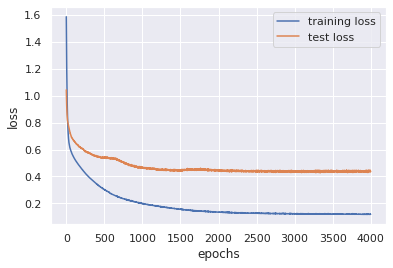

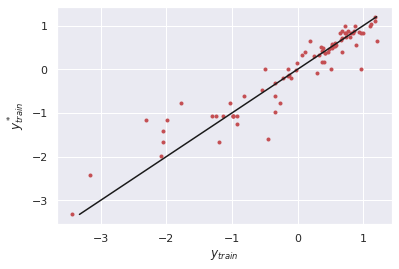

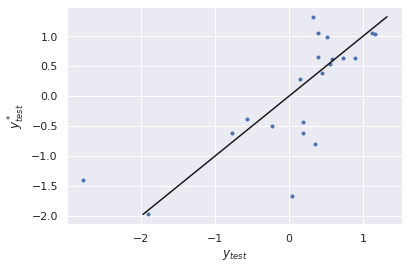

In [38]:
import seaborn as sns
sns.set()

plt.plot(history.history['mean_squared_error'], label = 'training loss')
plt.plot(history.history['val_mean_squared_error'], label = 'test loss')
#plt.yscale('log')
plt.legend()
plt.ylabel('loss')
plt.xlabel('epochs')

#TESTING
y_star_train = model.predict(X_train)
y_star_test = model.predict(X_test)

plt.figure()
plt.plot(y_train, y_star_train, 'r.')
plt.plot([y_star_train.min(), y_star_train.max()], [y_star_train.min(), y_star_train.max()], 'k')
plt.ylabel('$y^*_{train}$')
plt.xlabel('$y_{train}$')

plt.figure()
plt.plot(y_test, y_star_test, 'b.')
plt.plot([y_star_test.min(), y_star_test.max()], [y_star_test.min(), y_star_test.max()], 'k')
plt.ylabel('$y^*_{test}$')
plt.xlabel('$y_{test}$')

from sklearn.metrics import mean_squared_error
MSE_test = mean_squared_error(y_test, y_star_test)
MSE_train = mean_squared_error(y_train, y_star_train)

print('MSE train:', MSE_train)
print('MSE test:', MSE_test)
print("MSE train < MSE test?", MSE_train < MSE_test)
print()
from sklearn.metrics import r2_score
R2_train=r2_score(y_train, y_star_train)
print('R2_train: ',R2_train)
R2_test=r2_score(y_test, y_star_test)
print('R2_test: ',R2_test)
